# Homework 13: NLP
# Kushal Chandani (kc07535)
# kc07535@st.habib.edu.pk

In [290]:
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag
import nltk
from nltk import pos_tag, word_tokenize, RegexpParser
import spacy
from spacy import displacy
from collections import Counter
import en_core_web_sm
from bs4 import BeautifulSoup
import requests
import re
import numpy
from tika import parser

In [291]:
#Question 1

In [292]:
def url_to_string(url):
    res = requests.get(url)
    html = res.text
    soup = BeautifulSoup(html, 'html.parser')
    for script in soup(["script", "style", 'aside']):
        script.extract()
        return " ".join(re.split(r'[\n\t]+', soup.get_text()))

In [293]:
nlp = spacy.load('en_core_web_sm')
ny_bb = url_to_string('https://apnews.com/article/lionel-messi-argentina-win-world-cup-final-against-france-e13fc1886725a0fe4f9e053e16a061bc/index.html')
article = nlp(ny_bb)
len(article.ents)

487

In [294]:
labels = [x.label_ for x in article.ents]
Counter(labels)

Counter({'PERSON': 69,
         'EVENT': 40,
         'GPE': 153,
         'ORG': 49,
         'CARDINAL': 69,
         'DATE': 49,
         'FAC': 22,
         'NORP': 8,
         'ORDINAL': 18,
         'LOC': 5,
         'TIME': 5})

In [295]:
items = [x.text for x in article.ents]
Counter(items).most_common(10)

[('Argentina', 57),
 ('France', 35),
 ('Messi', 30),
 ('Qatar', 23),
 ('the World Cup', 22),
 ('21', 21),
 ('the Lusail Stadium', 19),
 ('Lusail', 19),
 ('Sunday, Dec. 18, 2022', 18),
 ('World Cup', 16)]

In [296]:
sentences = [x for x in article.sents]
print(sentences[50])

Messi achieved what Maradona did in 1986 and dominated a World Cup for Argentina.


In [297]:
displacy.render(nlp(str(sentences[50])), jupyter=True, style='ent')

In [298]:
dict([(str(x), x.label_) for x in nlp(str(sentences[50])).ents])

{'Messi': 'PERSON',
 'Maradona': 'PERSON',
 '1986': 'DATE',
 'World Cup': 'EVENT',
 'Argentina': 'GPE'}

In [299]:
[(x.orth_,x.pos_, x.lemma_) for x in [y for y in nlp(str(sentences[50])) if not y.is_stop and y.pos_ != 'PUNCT']]

[('Messi', 'PROPN', 'Messi'),
 ('achieved', 'VERB', 'achieve'),
 ('Maradona', 'PROPN', 'Maradona'),
 ('1986', 'NUM', '1986'),
 ('dominated', 'VERB', 'dominate'),
 ('World', 'PROPN', 'World'),
 ('Cup', 'PROPN', 'Cup'),
 ('Argentina', 'PROPN', 'Argentina')]

In [300]:
displacy.render(nlp(str(sentences)), jupyter=True, style='ent')

In [319]:
## Analysis of Question 1

# The article is about Lionel Messi winning the world cup for Argentina back in December 2022
# Given the abundance of organizations, events, Geographical entity and persons mentioned within the article,
# it becomes imperative to assess the accuracy and precision of the Named Entity Recognition (NER) model.
# The most common words in the article include Argentina, France and Messi.

# The model has exhibited commendable performance in meticulously analyzing and categorizing numerous entities,
# such as organizations, geographical entities and persons, as well as parts of speech like nouns and pronouns.
# Notably, employing the model on smaller text segments has yielded superior results compared to applying it to the entire article.
# The accuracy and precision achieved on these smaller chunks surpassed that observed when processing the entire article.
# Overall, the model excels in effectively classifying the words and sentences within the chosen article.

In [320]:
#Question 2

In [321]:
raw = parser.from_file('1815.pdf')
print(raw)

{'metadata': {'pdf:unmappedUnicodeCharsPerPage': ['8', '4', '3'], 'pdf:PDFVersion': '1.3', 'xmp:CreatorTool': 'XPP', 'pdf:hasXFA': 'false', 'access_permission:modify_annotations': 'true', 'access_permission:can_print_degraded': 'true', 'X-TIKA:Parsed-By-Full-Set': ['org.apache.tika.parser.DefaultParser', 'org.apache.tika.parser.pdf.PDFParser'], 'X-TIKA:content_handler': 'ToTextContentHandler', 'pdf:num3DAnnotations': '0', 'dcterms:created': '2004-01-26T11:15:06Z', 'dcterms:modified': '2004-01-26T11:48:10Z', 'dc:format': 'application/pdf; version=1.3', 'pdf:docinfo:creator_tool': 'XPP', 'pdf:overallPercentageUnmappedUnicodeChars': '0.0011014833580702543', 'access_permission:fill_in_form': 'true', 'pdf:docinfo:modified': '2004-01-26T11:48:10Z', 'pdf:hasCollection': 'false', 'pdf:encrypted': 'false', 'pdf:containsNonEmbeddedFont': 'false', 'Content-Length': '47730', 'pdf:hasMarkedContent': 'false', 'Content-Type': 'application/pdf', 'pdf:totalUnmappedUnicodeChars': '15', 'access_permissio

In [322]:
tokenize_words = nltk.tokenize.word_tokenize(raw['content'])
stopwords = nltk.corpus.stopwords.words('english')
stopwords.extend(["T", "J", "D", "S", "M", "H", "et al", "et", "pp", "a.", "m.", "d.", "j.", "s.", "r.", "c.", "t."])
no_stopwords = [word for word in tokenize_words if word.lower() not in stopwords]

# remove punctuation, count raw words
nonPunct = re.compile('.*[A-Za-z].*')
clean_words = [w for w in no_stopwords if nonPunct.match(w)]
    
filtered_word_freq = nltk.FreqDist(clean_words)

In [323]:
filtered_word_freq.most_common(20)

[('coli', 55),
 ('E.', 46),
 ('wells', 41),
 ('water', 25),
 ('coliforms', 22),
 ('Colilert-18', 16),
 ('detection', 15),
 ('yellow', 15),
 ('coliform', 14),
 ('Escherichia', 13),
 ('rate', 13),
 ('isolates', 12),
 ('Appl', 12),
 ('Microbiol', 12),
 ('Environ', 11),
 ('freshwater', 10),
 ('false-positive', 10),
 ('m-TEC', 10),
 ('agar', 10),
 ('using', 9)]

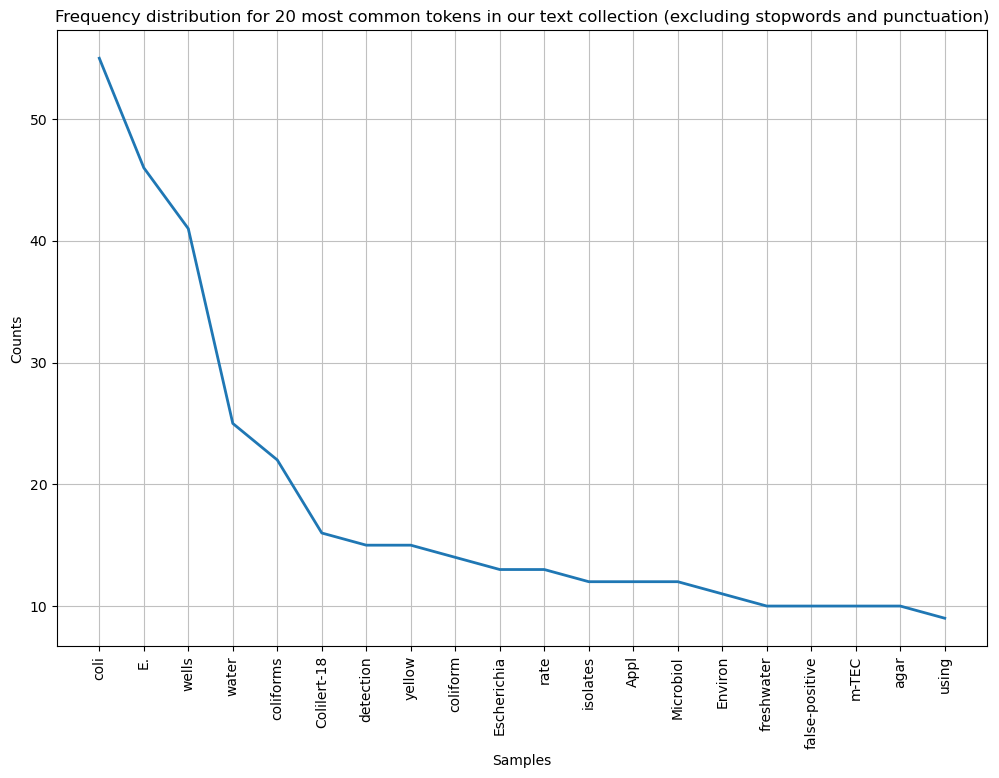

<Axes: title={'center': 'Frequency distribution for 20 most common tokens in our text collection (excluding stopwords and punctuation)'}, xlabel='Samples', ylabel='Counts'>

In [324]:
filtered_word_freq.plot(20, title='Frequency distribution for 20 most common tokens in our text collection (excluding stopwords and punctuation)')

In [325]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

In [326]:
plt.rcParams['figure.figsize'] = [12, 8]

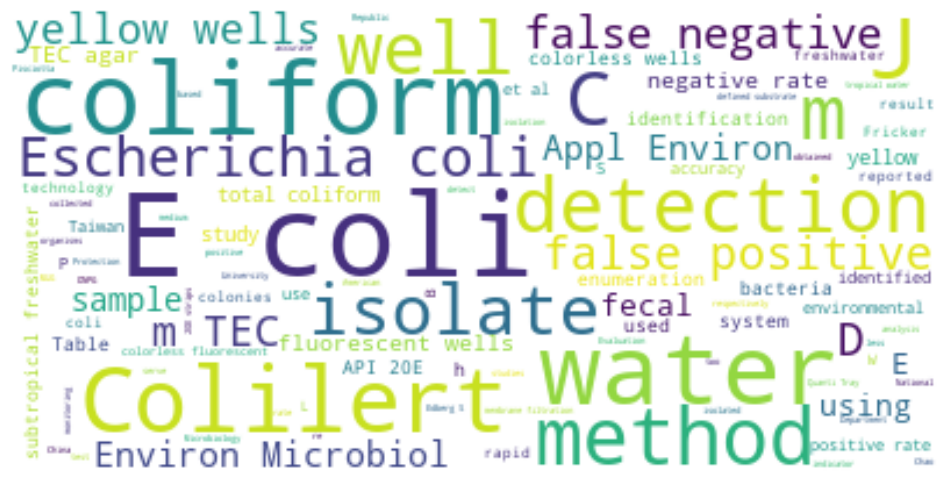

In [327]:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(raw['content'])
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

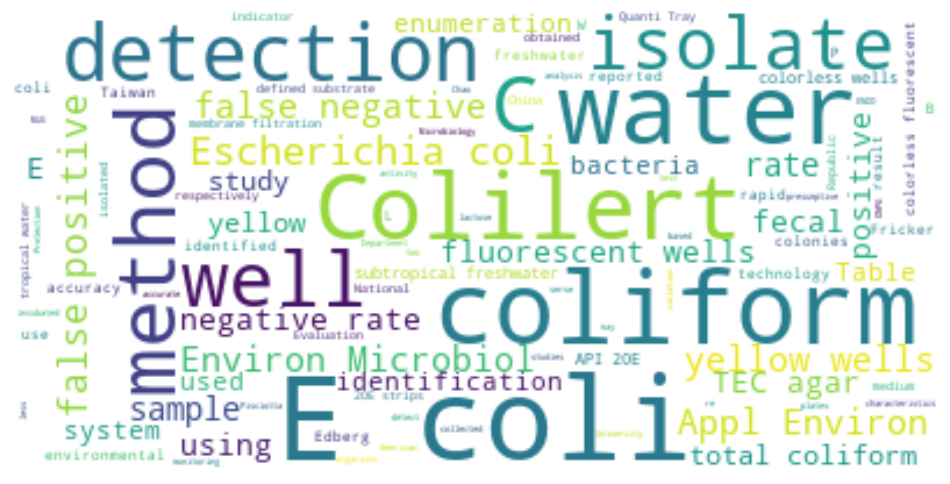

In [328]:
# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["T", "J", "D", "S", "M", "H", "et al", "et", "al"])

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, max_font_size=50, max_words=100, background_color="white").generate(raw['content'])

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [329]:
from rake_nltk import Rake

In [330]:
r = Rake()
r.extract_keywords_from_text(raw['content'])
r.get_ranked_phrases_with_scores()[:10]

[(67.50223635258747,
  'positive negative fna fpb fame analysis 240 yellow wells 217 23 9'),
 (60.14089237320945, '1 fame � api 20e 149 yf wells 138 11 7'),
 (37.523809523809526, 'two direct identification systems may well pro'),
 (35.43717664449372, 'tec agar 224 yfc wells 184 40 17'),
 (32.69565217391305, 'ples obtained near metropolitan taipei using colilert'),
 (27.9, 'eu drinking water directive reference methods'),
 (27.166666666666668, 'indole – methyl red – voges'),
 (26.209543166860243, '6 350 colorless wells 22 328 6'),
 (25.0, 'fatty acid methyl ester pro'),
 (25.0, 'fatty acid methyl ester analysis')]

In [331]:
nlp = spacy.load('en_core_web_sm')
doc2 = nlp(raw['content'])
print(doc2.ents)

(APPLIED, Feb. 2004, 1242–1244, 70, 2, 10.1128, 2004, American Society for Microbiology, Detection of Coliforms, Eschericha, Subtropical Freshwater, Kuo-Kuang, Chen-Ching, Wei-Liang, Department of Microbiology, Shih Lin, Taipei,1, Department of Soil Environmental

Science, National Chung-Hsing University, Taiwan, Republic of China, 29 September 2003, 13 November 2003, Escherichia, API 20E, 7.4, 3.5%, 9.6, 6.3%, Taiwan, Klebsiella, Enterobacter, Citrobacter, Serratia, 8), Taiwan, 20,000, CFU, 100, The Republic of China, Protection Agency, two, One, 4, MUG, Laboratories, Maine, Colilert, Colilert, 4, 5, 6, 18, 100%, 10, 14, 16, Taiwan, Herein, Taipei, Thirteen, 11, June 2002, January 2003, at least 3, between 9 and 11 a.m., Water, 28.5, July-September, 22.3 � 0.9, December, 500-ml, less than, Quanti-Tray/, 2000, 366, Quanti-Trays, less than 20, 640, 224, 359, 54, 3, Quanti-Tray, Difco, Detroit, Mich., 35, 24, 35 � 0.5, 2, 44.5 � 0.2, 22, 40, 1%, 3, 17.9%, 40, 224, 3, 85%, TEC, 2, 9, appr

In [332]:
import yake

In [333]:
kw_extractor = yake.KeywordExtractor()
language = "en"
max_ngram_size = 2
deduplication_threshold = 0.9
numOfKeywords = 20
custom_kw_extractor = yake.KeywordExtractor(
    lan=language, n=max_ngram_size, dedupLim=deduplication_threshold, top=numOfKeywords, features=None)
keywords = custom_kw_extractor.extract_keywords(raw['content'])
for kw in keywords:
    print(kw)

('coli', 0.0034654935453614162)
('Escherichia coli', 0.00387388119762096)
('Coliforms', 0.011612652261808399)
('water', 0.01203667661172426)
('coliform', 0.017806066801439542)
('Escherichia', 0.018349103362886404)
('Detection', 0.021838035442879124)
('coliform detection', 0.022014176947027456)
('Yellow', 0.026840716266868053)
('total coliforms', 0.027545313844221306)
('rate', 0.028633296355839492)
('Microbiol', 0.030010166969215882)
('Environ', 0.03227941273327745)
('Appl', 0.0345090110435822)
('Freshwater', 0.03621438888758091)
('m-TEC agar', 0.0376656288193499)
('isolates', 0.038273252442681746)
('Subtropical Freshwater', 0.03980408246319197)
('coli detection', 0.0403186050406342)
('method', 0.042163985833161964)


In [334]:
import textacy
  
#Load a spacy model, which will be used for all further processing. 
en = textacy.load_spacy_lang("en_core_web_sm") 

In [335]:
#convert the text into a spacy document. 
doc = textacy.make_spacy_doc(raw['content'], lang=en)  
print("Textrank output: \n", textacy.extract.keyterms.textrank(doc, 
                                                             normalize="lemma", 
                                                             topn=5)) 
print("Print all keywords output: \n")
keywords = [kps for kps, weights in 
                            textacy.extract.keyterms.textrank(doc, 
                                                              normalize="lemma")] 
print(keywords) 

Textrank output: 
 [('E. coli isolate', 0.013358419951394765), ('presumptive E. coli colony', 0.012124610871661813), ('E. coli detection', 0.011973413436168544), ('water directive reference method', 0.011852125523690324), ('typical E. coli characteristic', 0.011034693191744627)]
Print all keywords output: 

['E. coli isolate', 'presumptive E. coli colony', 'E. coli detection', 'water directive reference method', 'typical E. coli characteristic', 'good biological drinking water indicator', 'accurate coliform detection system', 'accurate E. coli', 'river water sample', 'potable water sample']


In [336]:
# Analysis for Question 2

# The article I've chosen delves into a research paper titled 'Evaluation of Colilert-18 for Detection of Coliforms and Eschericha,' which is a research paper
# discussing the results of bacteria detection and E-coli detection. 

# The most prevalent words in the PDF are "Coli," "E.," and "wells," which is expected given the article's subject matter.
# The frequency distribution graph accurately reflects the occurrence of words in the document.

# Rake analysis highlights a sentence that is highly relevant, focusing on positive and negative aspects, 
#aligning with the article's overall discussion of results in those terms.

# Yake identifies the most common words overall, with "coli" being the most frequently occurring word.

#For textacy, The output represents the top keywords extracted from the text using the TextRank algorithm. 
#Each keyword is accompanied by a weight, which indicates its importance in the context of the given text.

# Utilizing frequency graphs, the most frequently used words in the paper were charted as a method of analysis.
# However, a limitation of this frequency graph approach was its treatment of words with similar meanings as distinct entities.
# The word cloud technique was implemented to visually represent key terms from the document, resulting in effective visualizations.
# Rake and Yake successfully identified significant keywords.
# A common issue observed with both Rake and Yake was the repetition of keywords in their respective results.

In [269]:
#Question 3

In [340]:
from textblob import TextBlob
import tweepy as tw
from nltk.corpus import stopwords

In [341]:
file_path = 'Naruto13.txt' 
with open(file_path, 'r', encoding='utf-8') as file:
    tweets = file.readlines()
print(tweets)

['Unleash the explosive power of Naruto Uzumaki with his FiguartsZERO - Sage Art Lava Release Rasenshuriken Version!\n', 'Naruto fanbases with verified accounts feeding their families by making one piece tweets.\n', 'You guys are the best as you are engaging with my Naruto tweets since long and you are so helpful to my timeline and help me increase my reach to people.\n', 'Naruto Uzumaki the greatest to ever do it, changed my perspective on life and how i treat others and no matter what i should always push through no matter how bad my situation was. \n', "A live-action Naruto film? There's only one thing to do. Replace all the characters with diverse women and make them do nothing but complain about the patriarchy.\n", "It's weird. I dislike super exaggerated animation, I will never be the one to defend this scene from Naruto because super abstract stuff is cool, Madoka is a visual treat when they get weird.\n", 'I love how Naruto fans have nothing interesting to talk about their own 

In [342]:
positive_count = 0
negative_count = 0
neutral_count = 0


for tweet in tweets:
    # Clean the tweet by removing special characters and links
    cleaned_tweet = re.sub(r'https?:\/\/\S+', '', tweet)
    cleaned_tweet = re.sub(r'[^a-zA-Z0-9\s]', '', cleaned_tweet)

    # Tokenize and remove stopwords
    tokens = word_tokenize(cleaned_tweet)
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word.lower() not in stop_words]

    # Perform Sentiment Analysis using TextBlob
    analysis = TextBlob(' '.join(filtered_tokens))

    print(tweet)
    print(analysis.sentiment)
    
    # Classify the sentiment
    if analysis.sentiment.polarity > 0:
        positive_count += 1
    elif analysis.sentiment.polarity < 0:
        negative_count += 1
    else:
        neutral_count +=1

# Display total positive, negative and neutral sentiment counts
print('\n')
print(f'Total Positive Sentiment Count: {positive_count}')
print(f'Total Negative Sentiment Count: {negative_count}')
print(f'Total Neutral Sentiment Count: {neutral_count}')

Unleash the explosive power of Naruto Uzumaki with his FiguartsZERO - Sage Art Lava Release Rasenshuriken Version!

Sentiment(polarity=0.0, subjectivity=0.0)
Naruto fanbases with verified accounts feeding their families by making one piece tweets.

Sentiment(polarity=0.0, subjectivity=0.0)
You guys are the best as you are engaging with my Naruto tweets since long and you are so helpful to my timeline and help me increase my reach to people.

Sentiment(polarity=0.44999999999999996, subjectivity=0.4666666666666666)
Naruto Uzumaki the greatest to ever do it, changed my perspective on life and how i treat others and no matter what i should always push through no matter how bad my situation was. 

Sentiment(polarity=0.15000000000000008, subjectivity=0.8333333333333333)
A live-action Naruto film? There's only one thing to do. Replace all the characters with diverse women and make them do nothing but complain about the patriarchy.

Sentiment(polarity=0.0, subjectivity=0.0)
It's weird. I disli

In [343]:
# Display one positive sentiment
for tweet in tweets:
    analysis = TextBlob(tweet)
    if analysis.sentiment.polarity > 0:
        print('Highest =',analysis.sentiment.polarity)
        print(f'Positive Sentiment Tweet: {tweet}')
        break

# Display one negative sentiment
for tweet in tweets:
    analysis = TextBlob(tweet)
    if analysis.sentiment.polarity < 0:
        print('lowest =',round(analysis.sentiment.polarity,2))
        print(f'Negative Sentiment Tweet: {tweet}')
        break

Highest = 0.44999999999999996
Positive Sentiment Tweet: You guys are the best as you are engaging with my Naruto tweets since long and you are so helpful to my timeline and help me increase my reach to people.

lowest = -0.07
Negative Sentiment Tweet: It's weird. I dislike super exaggerated animation, I will never be the one to defend this scene from Naruto because super abstract stuff is cool, Madoka is a visual treat when they get weird.



In [344]:
#Analysis of Question 3

#The algorithm seems to work perfectly as the text i took are 10 tweets related to one of the most popular animes Naruto
#The text has a variety of tweets ranging from postive to very neutral and negative ones.
#The posiitve tweet talks about a person thanking his followers for interacting with his tweets
#The negative tweet talks a person disliking the weird animation in one of the scenes.
#This is very accurate and overall classified well between positive and negative.